In [1]:
%cd ..

/home/oscarn/flan-gpt2


/home/oscarn/miniconda3/envs/transformers-311/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import pickle

with open('losses_ft.pkl', 'rb') as f:
    losses = pickle.load(f)

In [6]:
losses2 = []
for i in range(len(losses)):
    if i%5==0:
        losses2.append(losses[i])

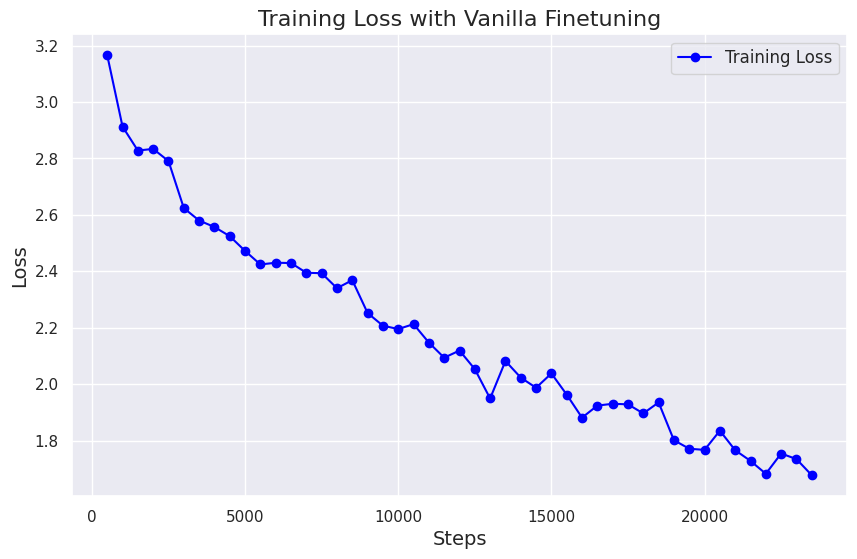

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#steps = list(range(1, len(losses) + 1))
steps = [step * 500 for step in range(1, len(losses2) + 1)]

# Apply Seaborn styles for a cleaner look
sns.set_theme()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, losses2, label='Training Loss', color='blue', linestyle='-', marker='o')
#plt.plot(steps, val_losses, label='Validation Loss', color='orange', linestyle='-', marker='o')

# Add title and labels
plt.title('Training Loss with Vanilla Finetuning', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Show legend and grid
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [2]:
import pickle

with open('losses_kd.pkl', 'rb') as f:
    losses = pickle.load(f)

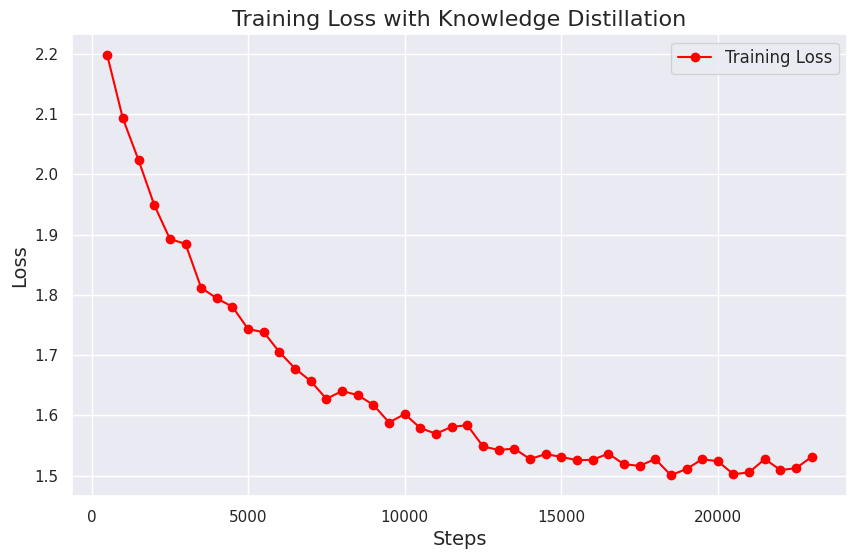

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

steps = [step * 500 for step in range(1, len(losses) + 1)]

# Apply Seaborn styles for a cleaner look
sns.set_theme()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(steps, losses, label='Training Loss', color='red', linestyle='-', marker='o')

# Add title and labels
plt.title('Training Loss with Knowledge Distillation', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Show legend and grid
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

Total accuracy on ANLI is 0.278
Total accuracy on BoolQ is 0.63
Rouge-1 score on Common Gen is 0.41949979626685274
Rouge-LSum score on XSum is 0.25363525295060957

Total accuracy on ANLI is 0.46
Total accuracy on BoolQ is 0.366
Rouge-1 score on Common Gen is 0.40595003470450663
Rouge-LSum score on XSum is 0.14937230334896565

Total accuracy on ANLI is 0.266
Total accuracy on BoolQ is 0.368
Rouge-1 score on Common Gen is 0.3501980962450041
Rouge-LSum score on XSum is 0.130679434839853

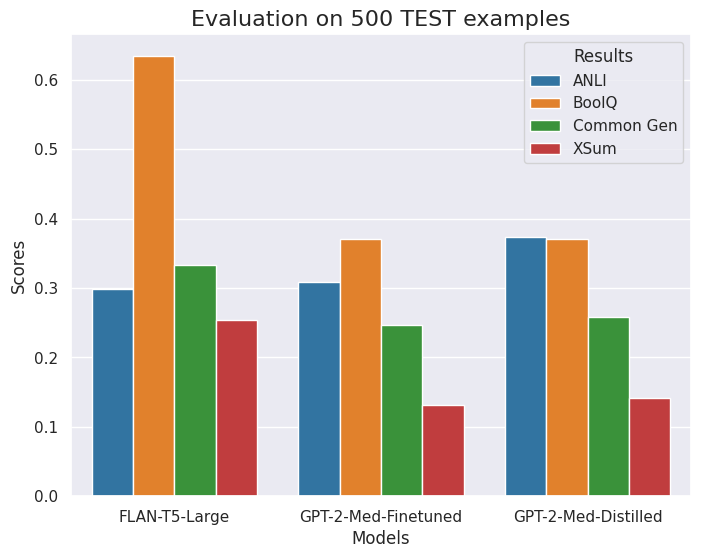

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
categories = ['FLAN-T5-Large', 'GPT-2-Med-Finetuned', 'GPT-2-Med-Distilled']
results_1 = [0.298, 0.308, 0.374]
results_2 = [0.634, 0.37, 0.37]
results_3 = [0.333, 0.247, 0.259]
results_4 = [0.254, 0.131, 0.141]

# Create a DataFrame to structure data for seaborn
data = pd.DataFrame({
    'Category': categories * 4,
    'Value': results_1 + results_2 + results_3 + results_4,
    'Result': ['ANLI'] * 3 + ['BoolQ'] * 3 + ['Common Gen'] * 3 + ['XSum'] * 3
})

# Set the seaborn style
sns.set_theme()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Category', y='Value', hue='Result', palette='tab10')

# Add title and labels
plt.title('Evaluation on 500 TEST examples', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.legend(title='Results')

# Show plot
plt.show()


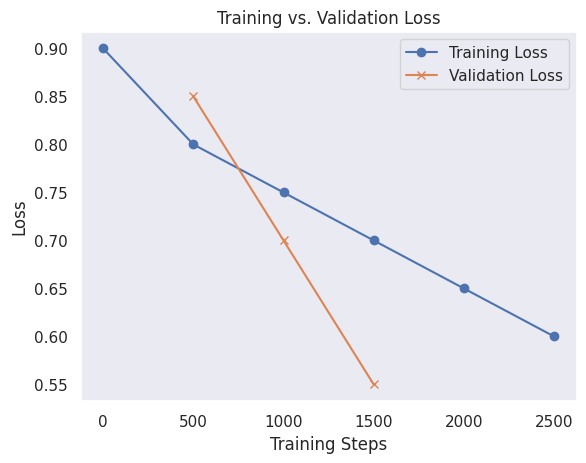

In [5]:
import matplotlib.pyplot as plt

# Example data
train_losses = [0.9, 0.8, 0.75, 0.7, 0.65, 0.6]  # Logged every 500 steps
val_losses = [0.85, 0.70, 0.55]                 # Logged once per epoch

# X-axis for training loss: steps, assume logging_steps=500
train_steps = [0, 500, 1000, 1500, 2000, 2500]

# X-axis for validation loss: epochs
val_epochs = [1, 2, 3]

# Plotting
plt.plot(train_steps, train_losses, label="Training Loss", marker="o")
plt.plot([epoch * 500 for epoch in val_epochs], val_losses, label="Validation Loss", marker="x")

plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.title("Training vs. Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

checkpoint = "HuggingFaceTB/SmolLM-135M"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForCausalLM.from_pretrained(checkpoint).to(device)

inputs = tokenizer.encode("def print_hello_world():", return_tensors="pt").to(device)
outputs = model.generate(inputs)
print(tokenizer.decode(outputs[0]))

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
/home/oscarn/miniconda3/envs/transformers-311/lib/python3.11/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


def print_hello_world():
    print("Hello World!")

# print_hello_
